# Loan Application Status Prediction

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

# Loading libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt               #for plotting and EDA
import seaborn as sns                         #for plotting and EDA
from sklearn.linear_model import LogisticRegression             #classification model
from sklearn.naive_bayes import GaussianNB                      #classification model
from sklearn.tree import DecisionTreeClassifier                 #classification model
from sklearn.ensemble import RandomForestClassifier             #classification model
from sklearn.svm import SVC                                     #classification model
from sklearn.model_selection import train_test_split            #for splitting dataset into training and testing
from sklearn.metrics import accuracy_score                      #for checking model accuracy
from sklearn.metrics import roc_auc_score                       #for checking model accuracy
from sklearn.metrics import confusion_matrix, classification_report      #for checking model accuracy
from sklearn.model_selection import cross_val_score                      #for cross validating model
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('loan_prediction.csv')
df = pd.DataFrame(data = df)

In [3]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
df.shape

(614, 13)

In [5]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Gender, Married, Education, Self_Employed, Property_Area and Loan_Status are all categorical data.

Even though Dependents column has numeric values but it is also categorical because it only has 5 values for it.

ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History are all continuous data.

In [6]:
df.apply(lambda x: len(x.unique()))

Loan_ID              614
Gender                 3
Married                3
Dependents             5
Education              2
Self_Employed          3
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      11
Credit_History         3
Property_Area          3
Loan_Status            2
dtype: int64

As mentioned above, we can see that Dependents column has 5 unique values.

In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


LoanAmount, Loan_Amount_Term, Credit_History all are missing some values since their value count is less than 614.

Mean of ApplicantIncome is 5403.46 and mode is 3812.50, the range is 150.00 - 81000.00 and IQR is 2877.50 - 5795.00.

Mean of CoapplicantIncome is 1621.25 and mode is 1188.50, the range is 0 - 41667.00 and IQR is 0 - 2297.25.

Mean of LoanAmount is 146.41 and mode is 128.00, the range is 9.00 - 700.00 and IQR is 100.00 - 168.00.

Mean of Loan_Amount_Term is 342.00 and mode is 360.00, the range is 12 - 480.00 and IQR is 360.00 - 360.00.

Mean of Credit_History is 0.84 and mode is 1, the range is 0 - 1 and IQR is 1 - 1.

In [8]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [9]:
df['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

# Checking and treating missing values

In [10]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

The dataset contains lots of null or missing values.

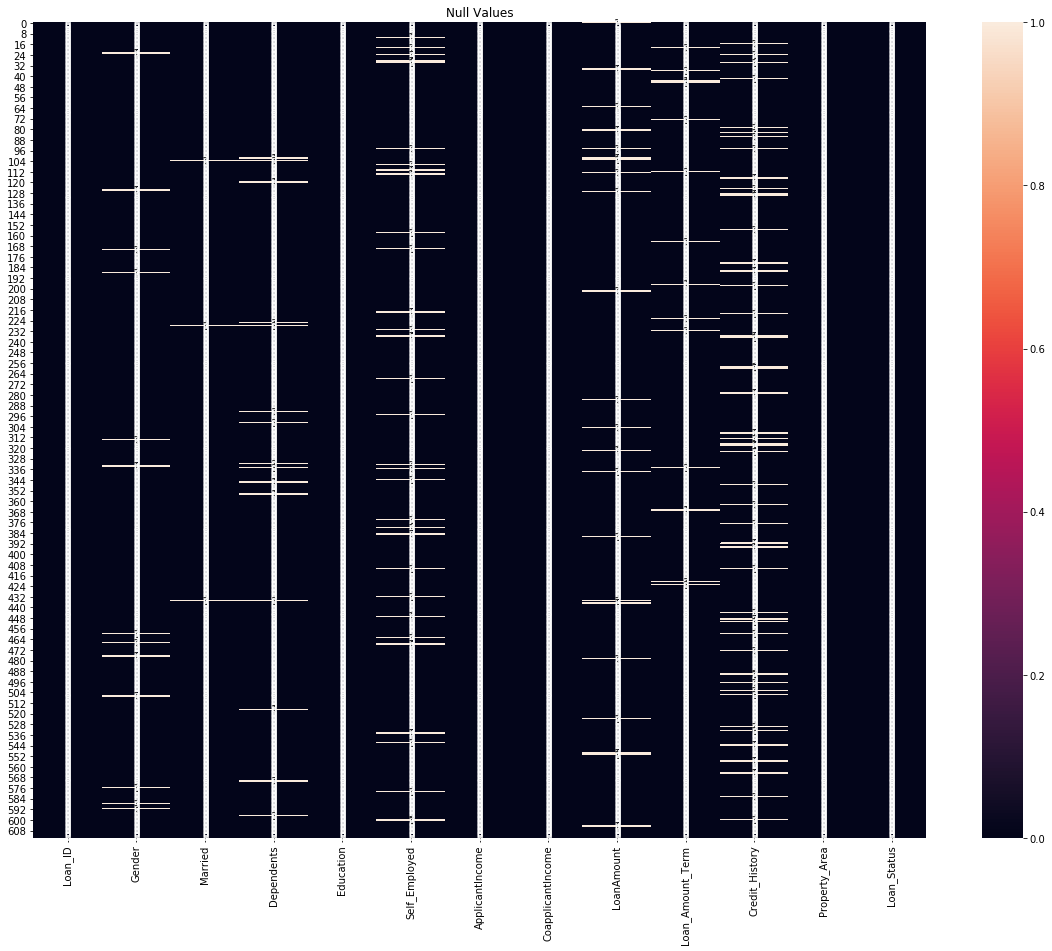

In [11]:
plt.figure(figsize = [20, 15])
sns.heatmap(df.isnull(), annot = True)                           #Visual representation of null values present in dataset
plt.title('Null Values')
plt.show()

In [12]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

Filled the missing values in continuous data with mean and mode in categorical data.

In [13]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

No missing values present in the dataset now.

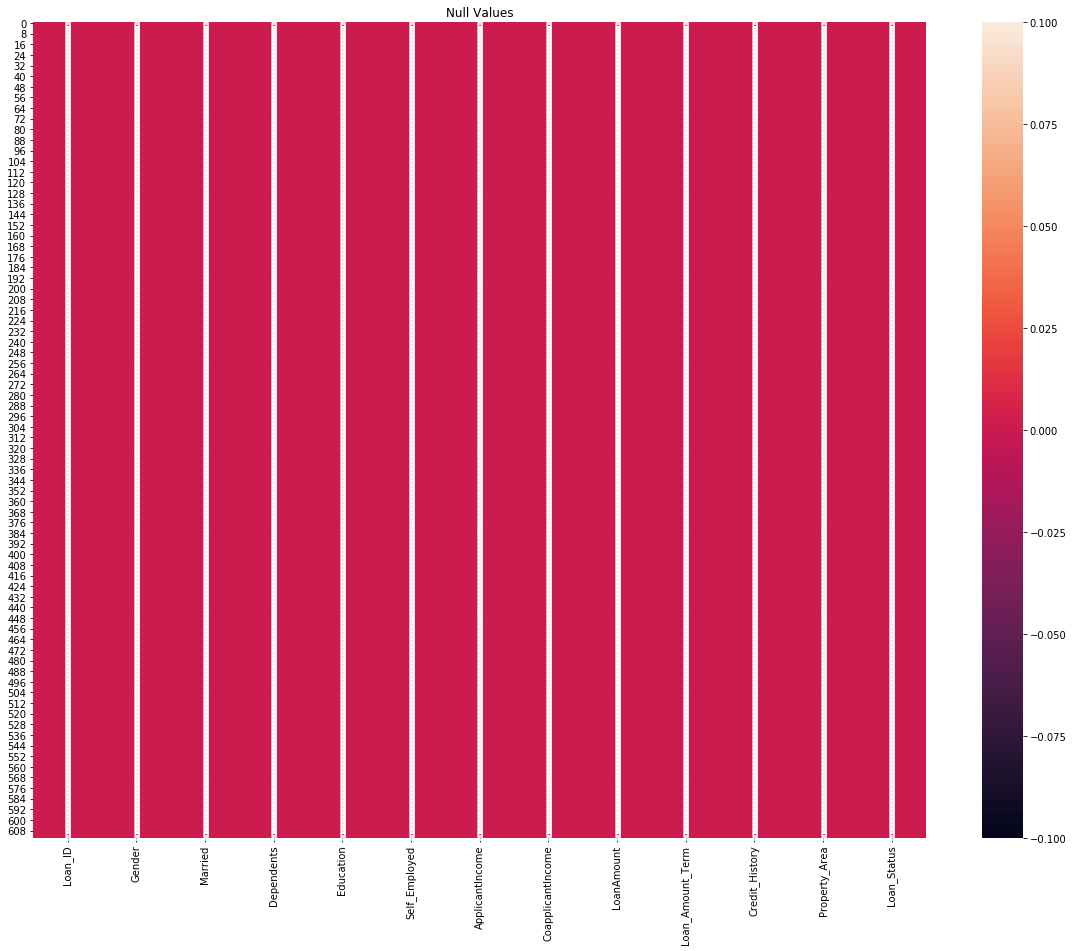

In [14]:
plt.figure(figsize = [20, 15])
sns.heatmap(df.isnull(), annot = True)                           #Visual representation of no null values present in dataset
plt.title('Null Values')
plt.show()

# EDA

In [15]:
s = (df.dtypes == 'object')
cate_cols = list(s[s].index)

print("Categorical variables:")
print(cate_cols)

Categorical variables:
['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [16]:
cate_cols.remove('Loan_ID')

In [17]:
for i in cate_cols:
    print (i, df[i].unique())

Gender ['Male' 'Female']
Married ['No' 'Yes']
Dependents ['0' '1' '2' '3+']
Education ['Graduate' 'Not Graduate']
Self_Employed ['No' 'Yes']
Property_Area ['Urban' 'Rural' 'Semiurban']
Loan_Status ['Y' 'N']


In [18]:
cate_cols.append('Credit_History')

In [19]:
s = (df.dtypes == 'float')
cont_cols = list(s[s].index)

print("Continuous variables:")
print(cont_cols)

Continuous variables:
['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [20]:
cont_cols.append('ApplicantIncome')
cont_cols.remove('Credit_History')

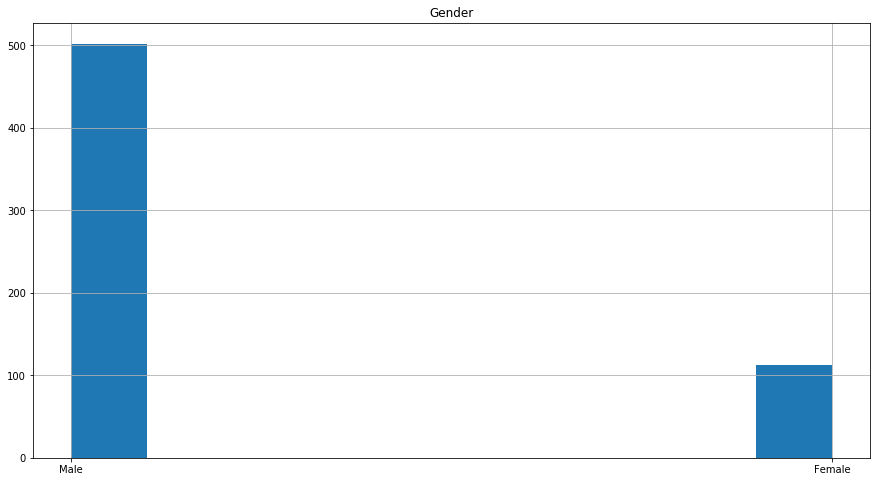

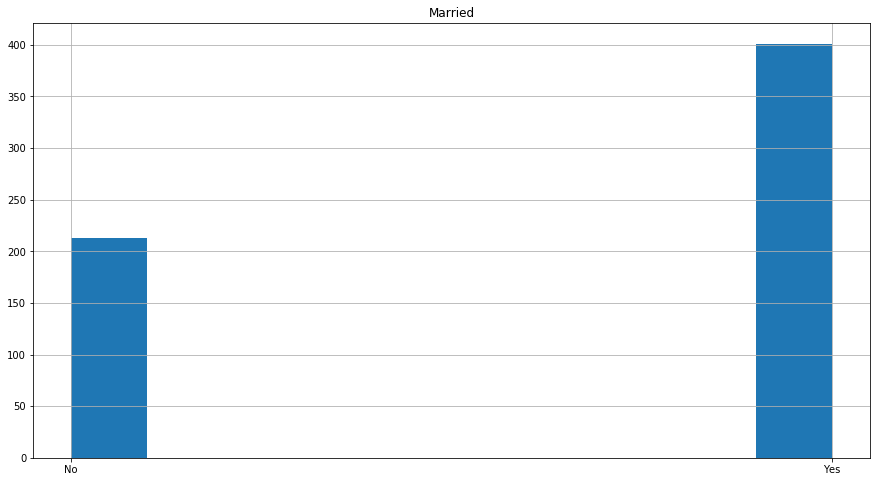

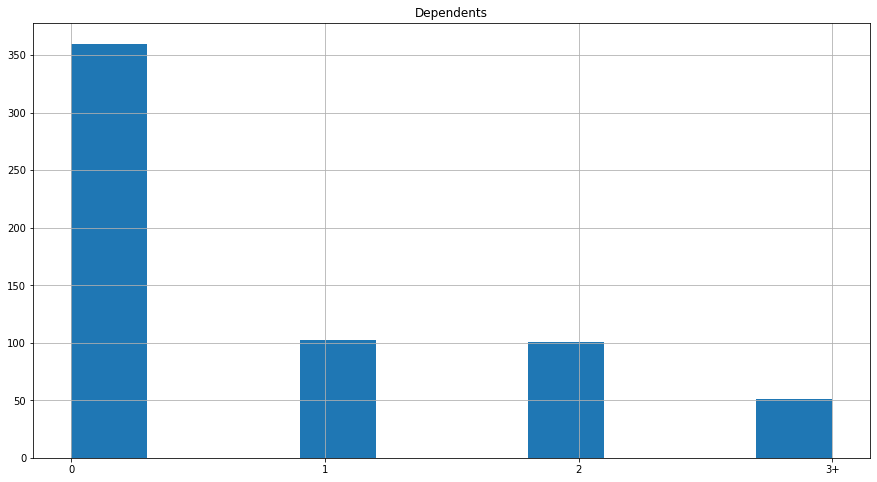

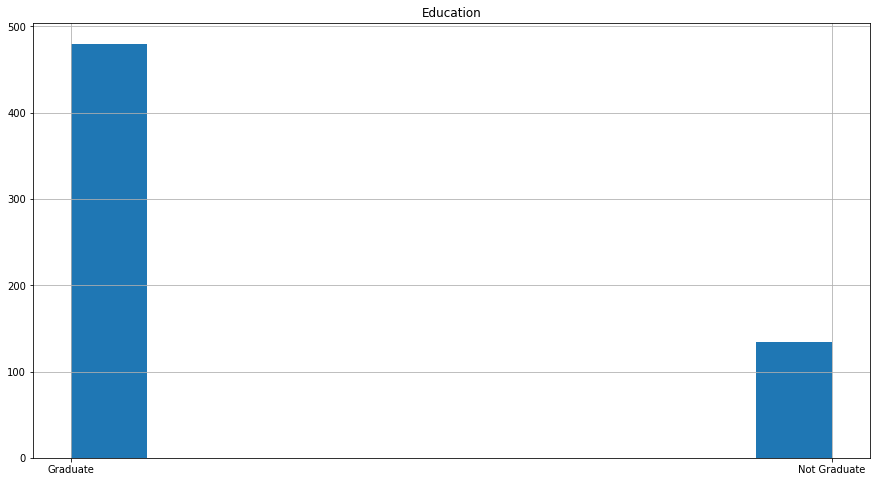

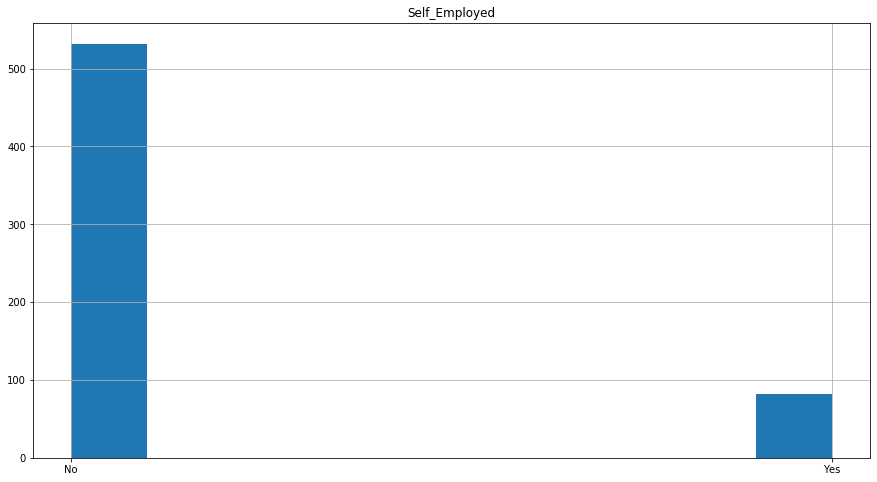

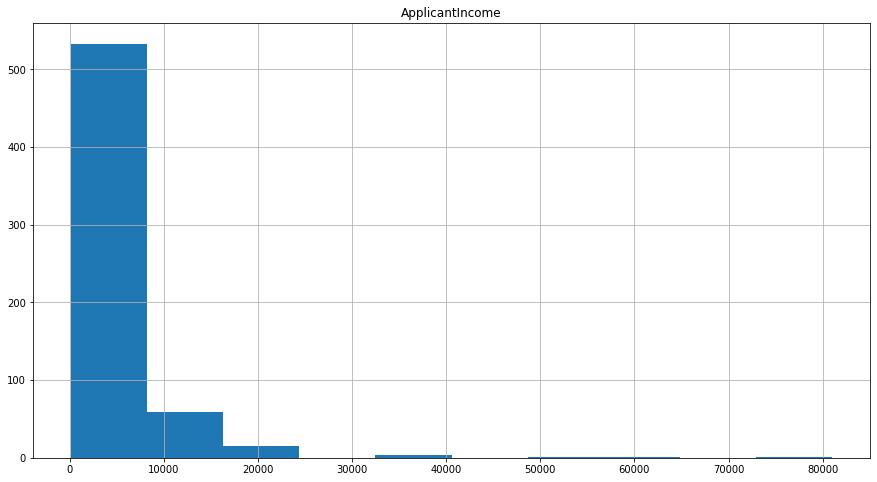

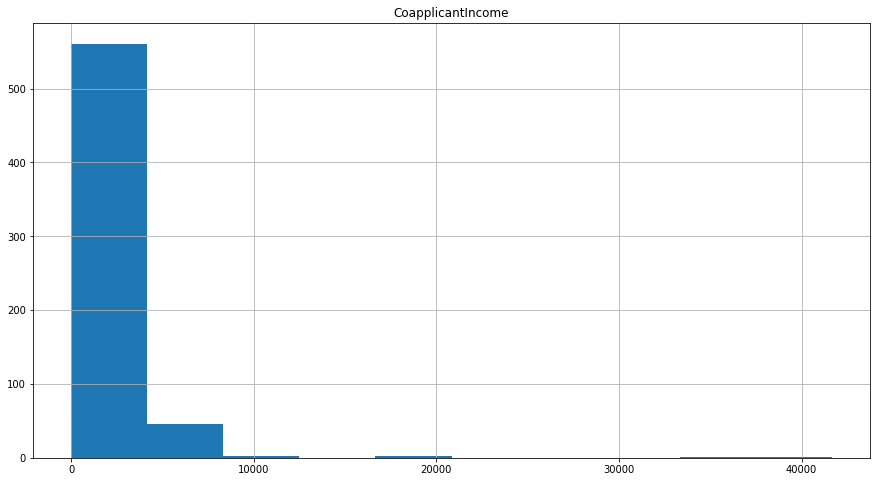

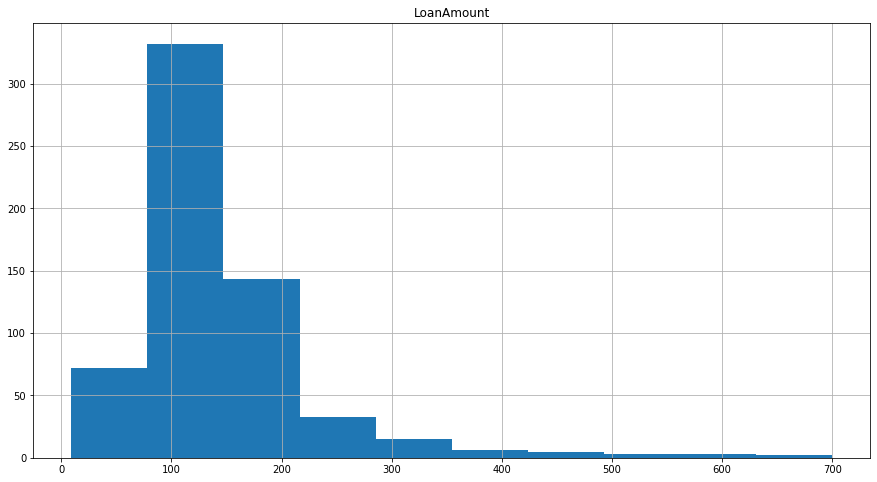

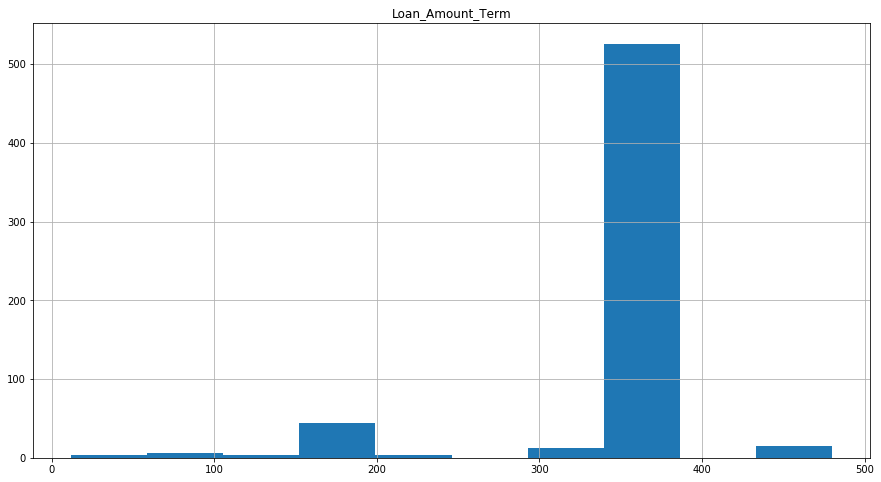

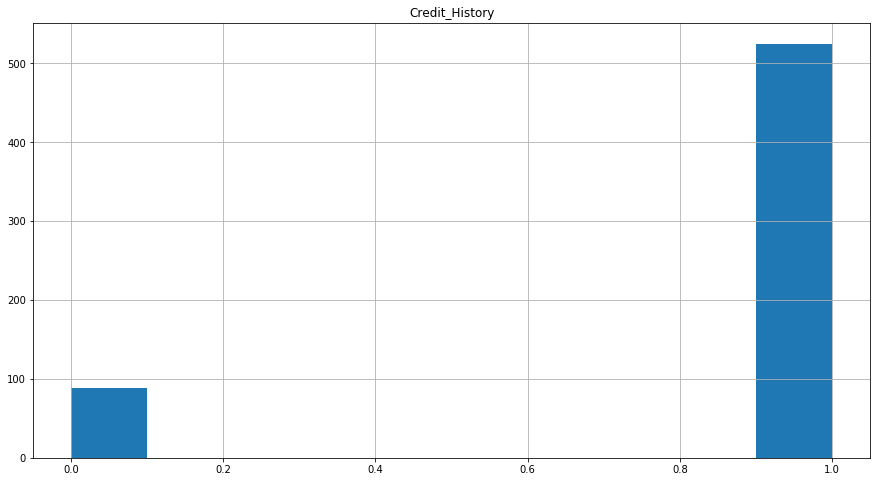

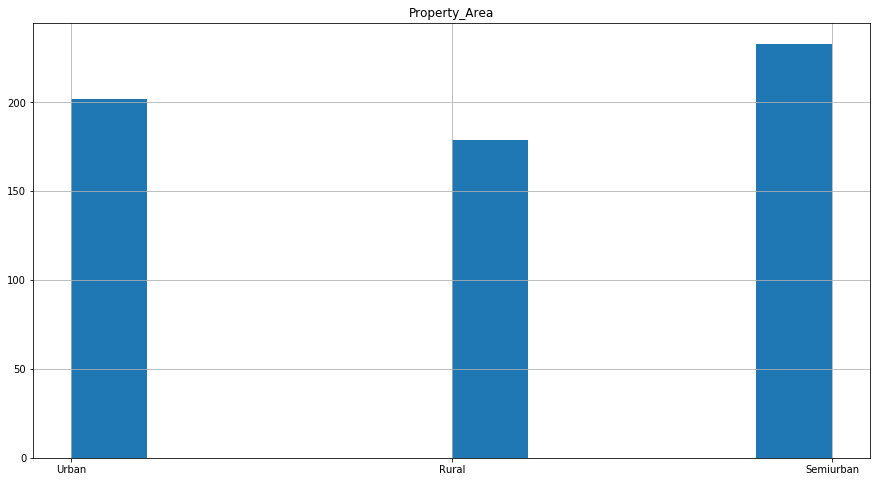

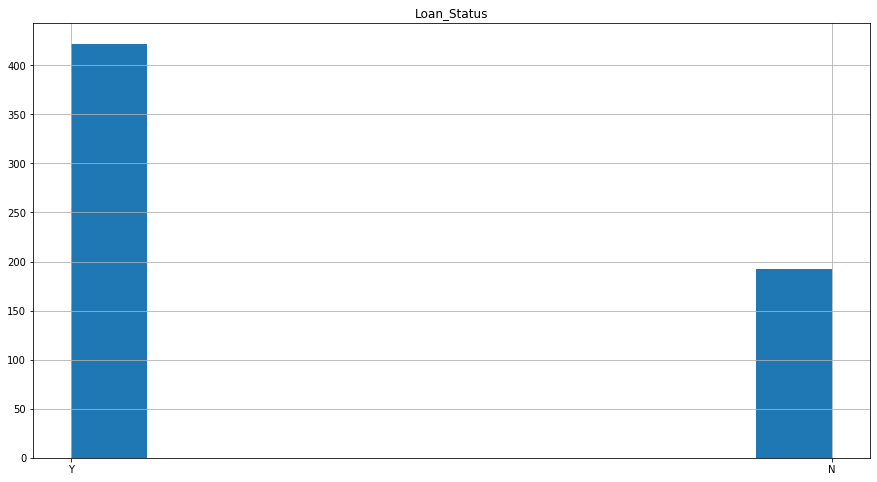

In [22]:
for i in df.columns[1:]:                                 #univariate analysis
    plt.figure(figsize = (15, 8))
    df[i].hist(grid = True)
    plt.title(i)
    plt.show()

Most of the loan applicants are male and are married with no dependents.

Most of the applicants are graduates and are not self employed.

Both the applicant and coapplicant income is below 10k in most of the cases.

The loan amount itself is usually very low, below 200 but the loan amount term is preferred to be high at 360.

Text(0.5, 1.0, 'Loan Status Pie Chart')

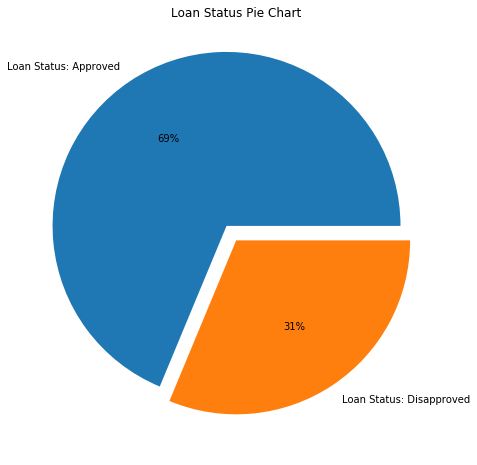

In [23]:
vals = [df['Loan_Status'][df['Loan_Status'] == 'Y'].count() , df['Loan_Status'][df['Loan_Status'] == 'N'].count()]
plt.figure(figsize = (15, 8))
label = ["Loan Status: Approved" , "Loan Status: Disapproved"]
plt.pie(vals , labels=label , autopct = '%1.0f%%' , explode=(0.1 , 0))
plt.title("Loan Status Pie Chart")

69% of the total applicants get their loans approved while only 31% gets denied.

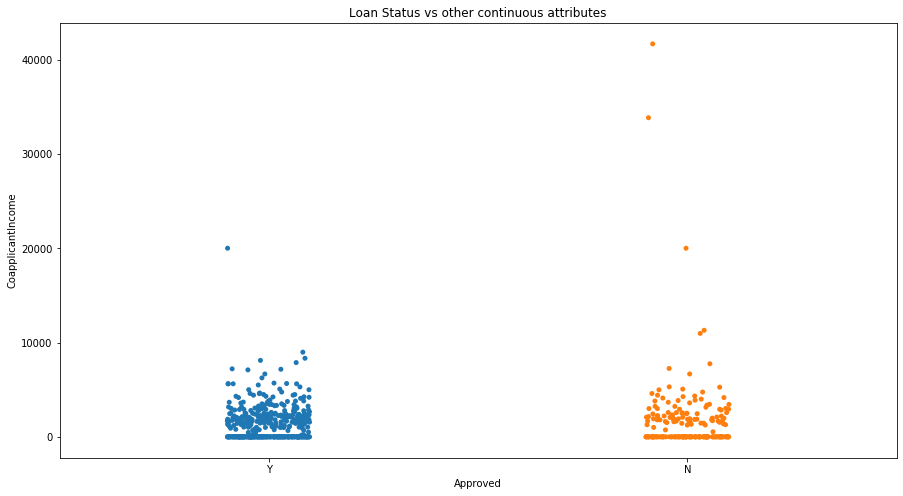

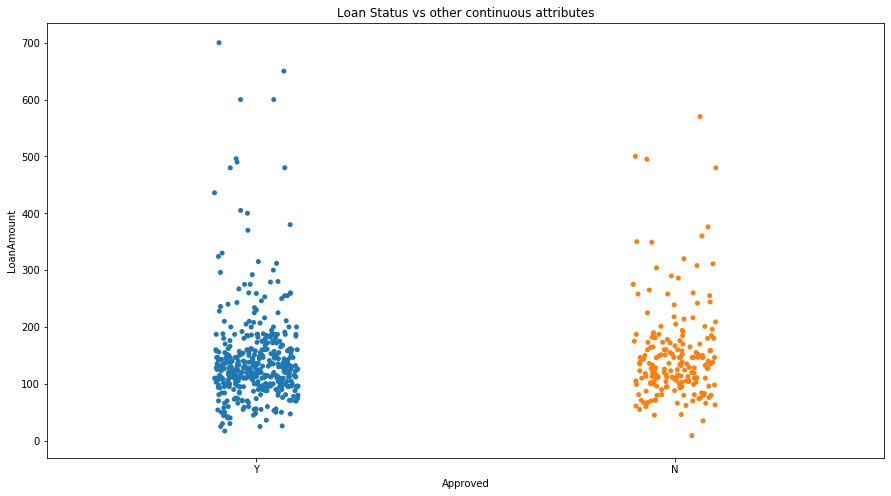

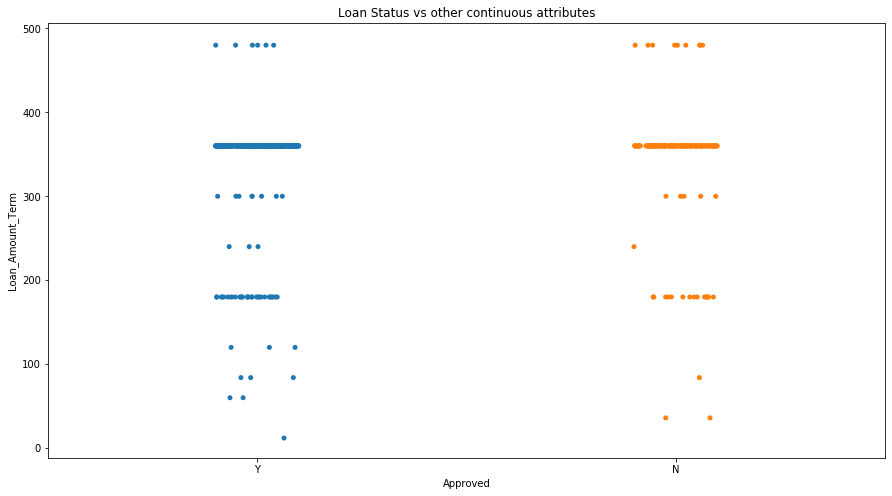

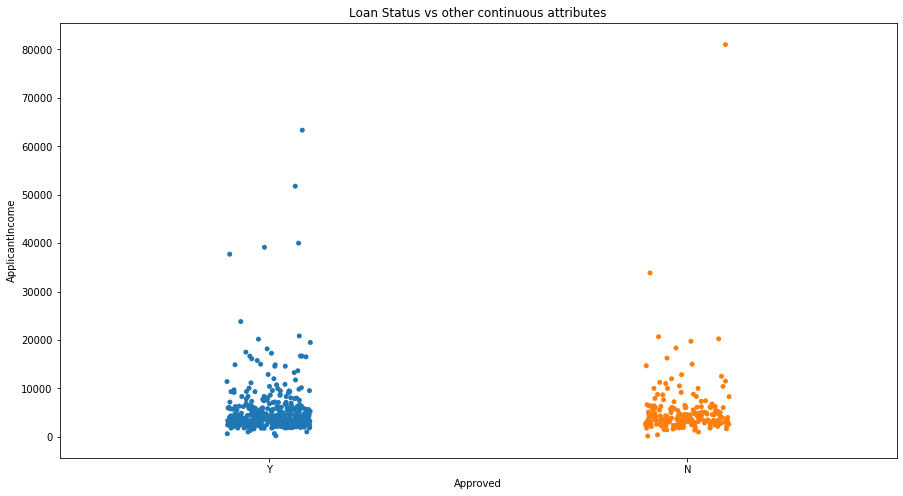

In [24]:
for i in cont_cols:                                          #bivariate analysis
    plt.figure(figsize = (15, 8))
    ax = sns.stripplot(df['Loan_Status'], df[i])
    ax.set(xlabel = 'Approved', ylabel = i)
    plt.title('Loan Status vs other continuous attributes')
    plt.show()

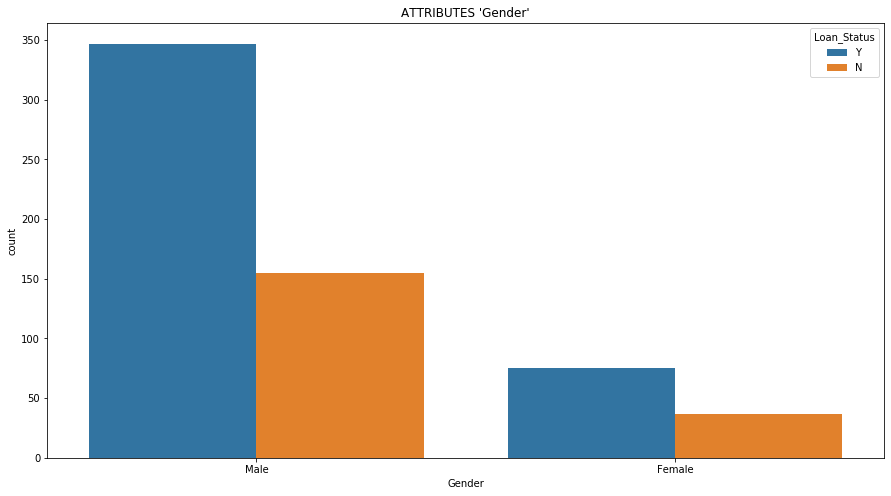

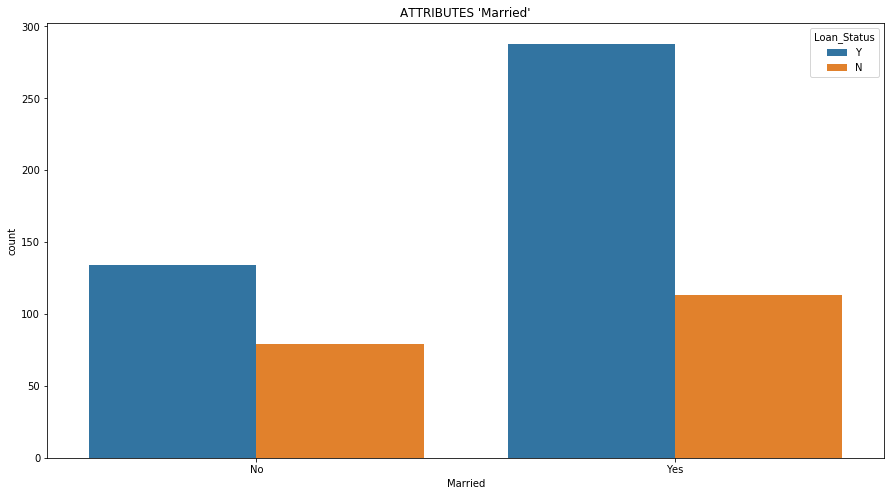

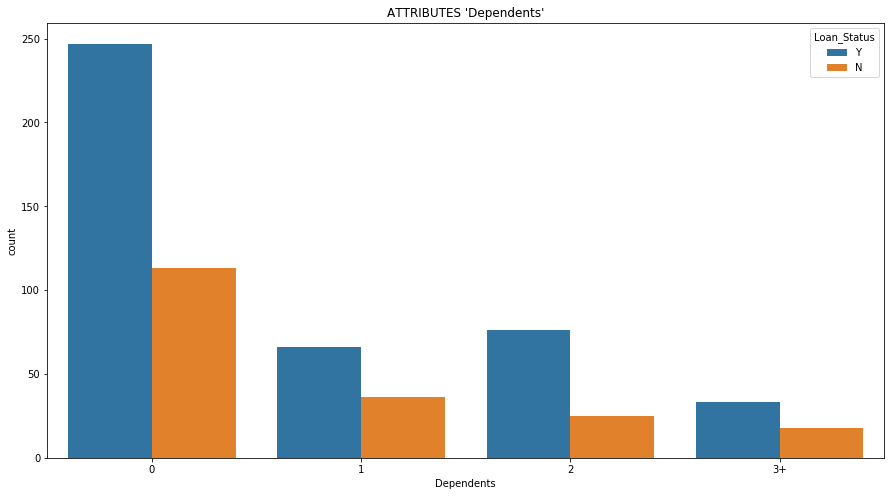

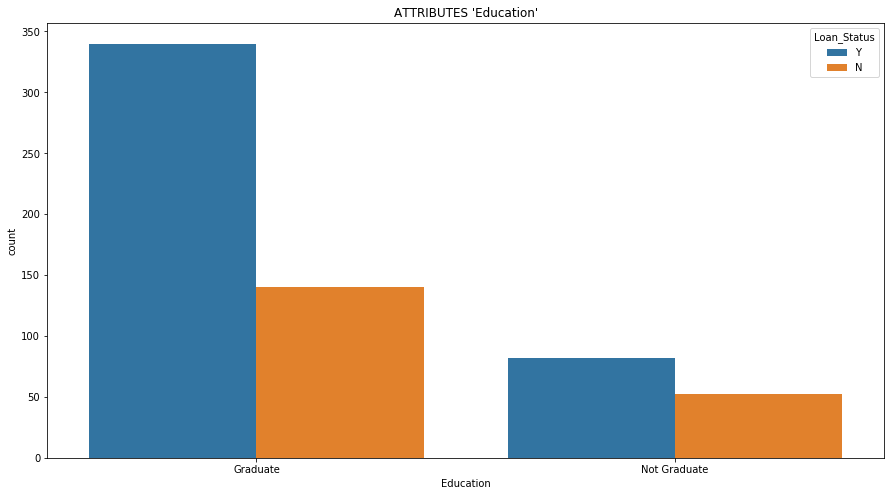

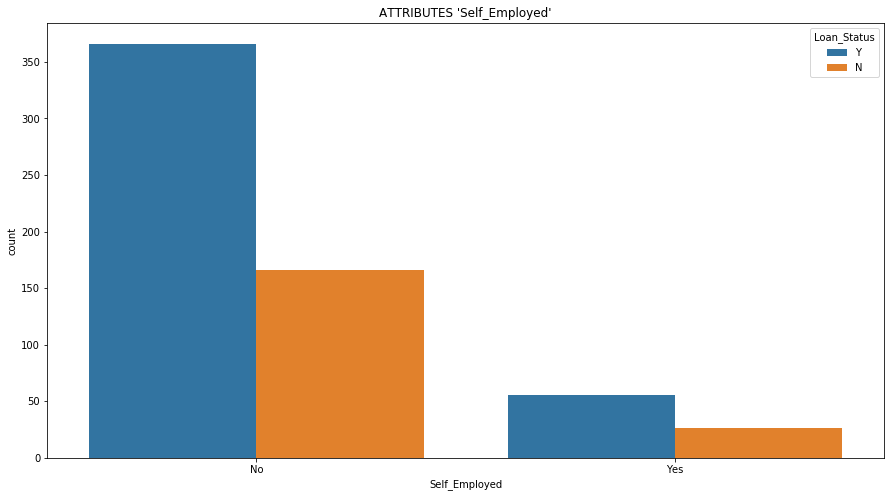

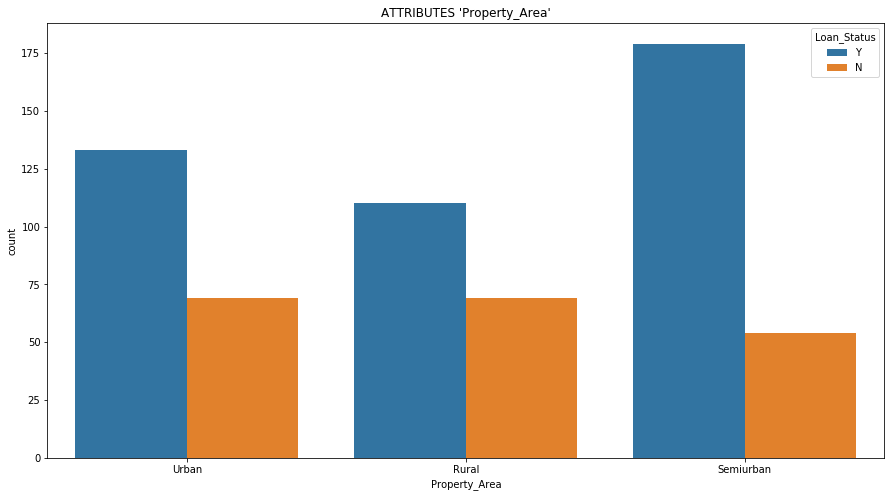

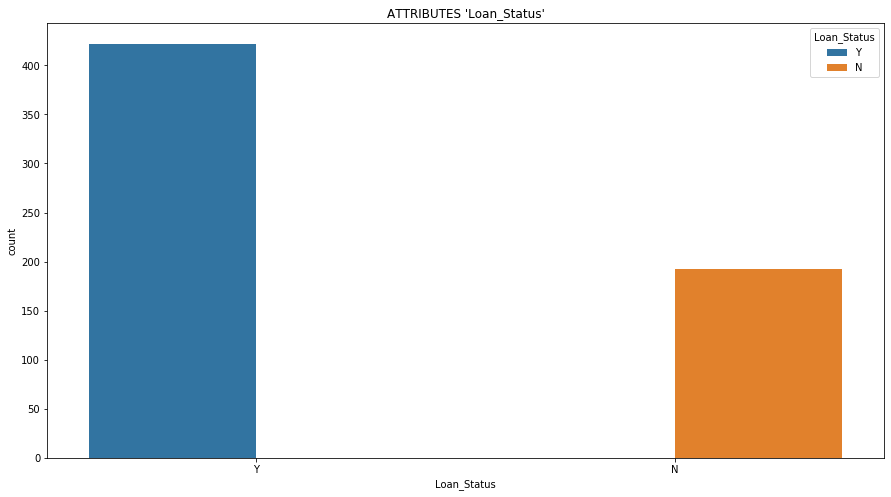

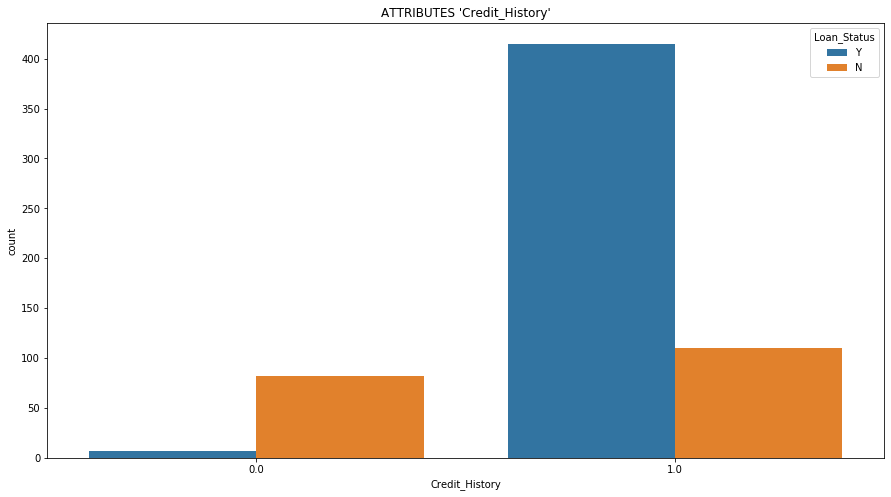

In [25]:
for i in cate_cols:                                #bivariate analysis
    plt.figure(figsize=(15, 8))
    plt.title("ATTRIBUTES '%s'"%i)
    sns.countplot(df[i],hue=df['Loan_Status'])

Graduates seems to have higher chances of getting their loans approved compared to not graduates.

People in seme urban area seems to have a higher approved:not approved ratio compared to rural and urban

People with no credit history does not get their Loans approved.

In [26]:
df['Loan_Status'].replace('N', 0, inplace = True)
df['Loan_Status'].replace('Y', 1, inplace = True)

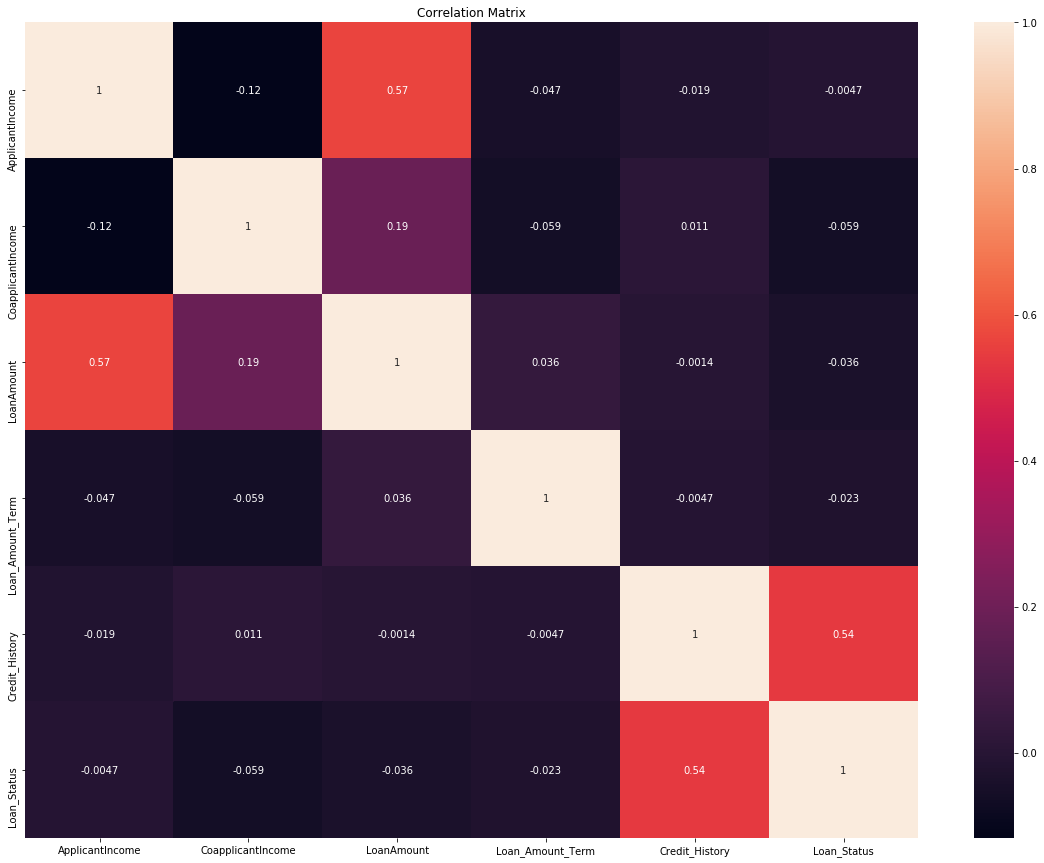

In [27]:
plt.figure(figsize = [20, 15])                             #multivariate analysis
sns.heatmap(df.corr(), annot = True)
plt.title('Correlation Matrix')
plt.show()

Only Credit History has a high correlation with Loan Status with 0.54. All other columns have negative correlation with values less than 0.1.

# Outliers and Skewness

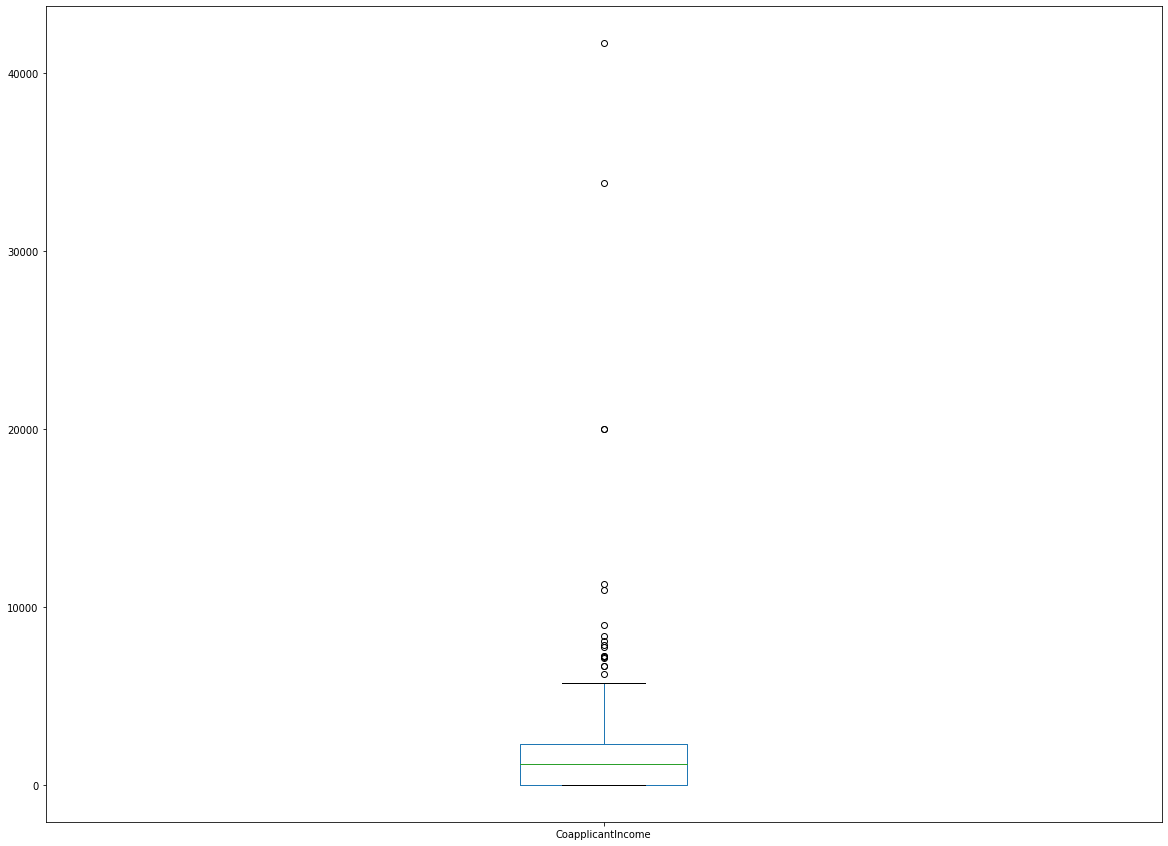

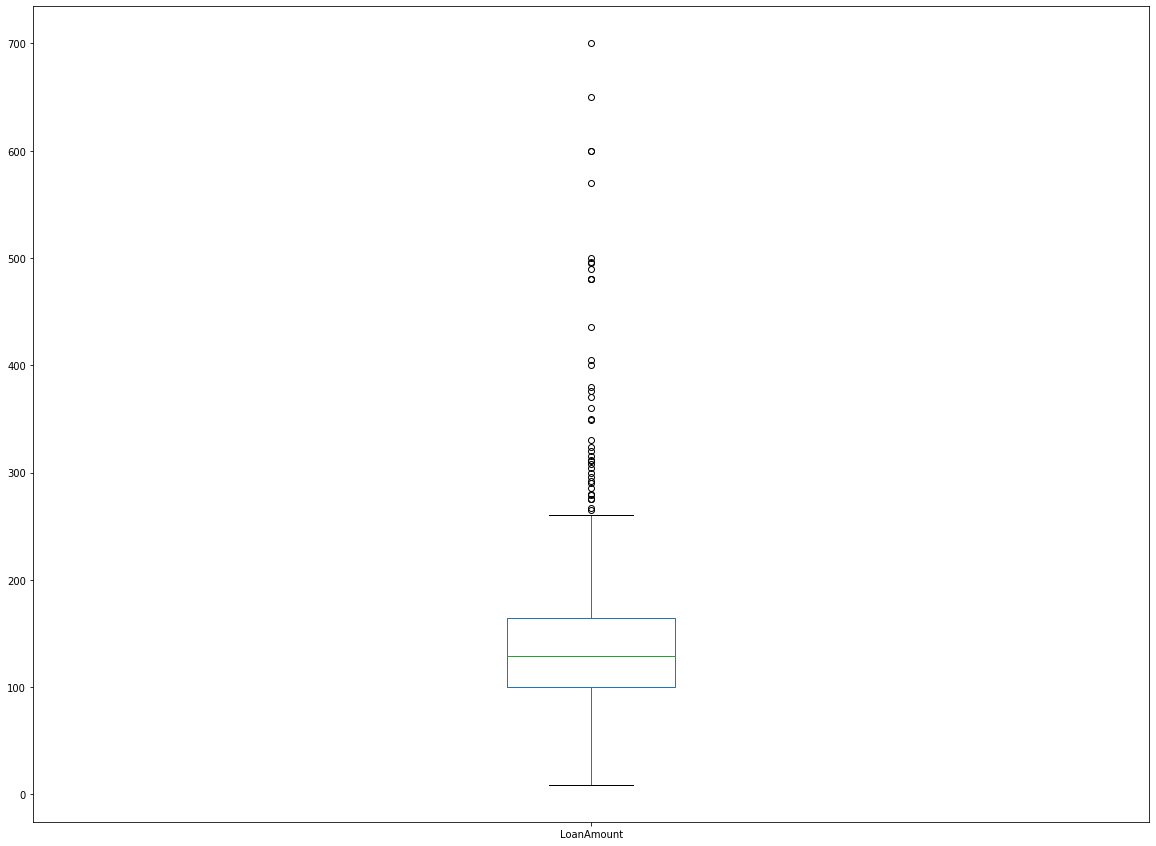

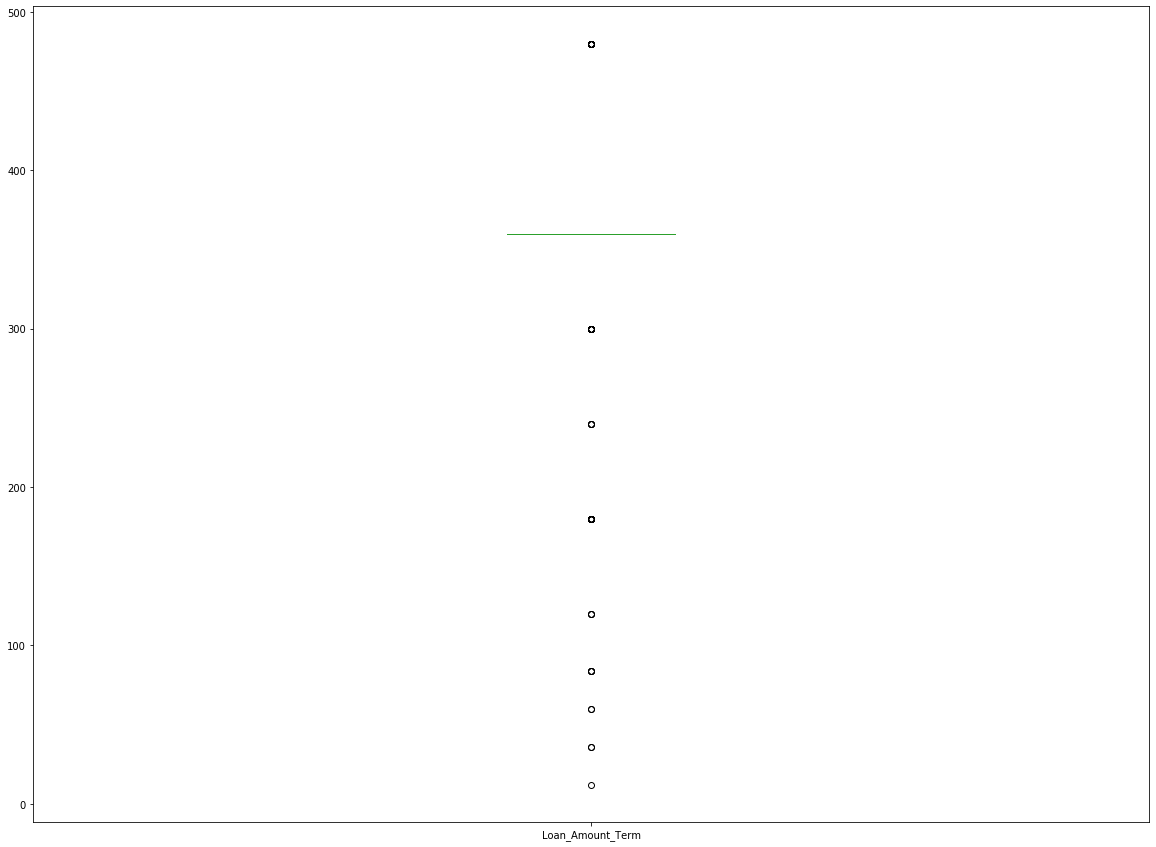

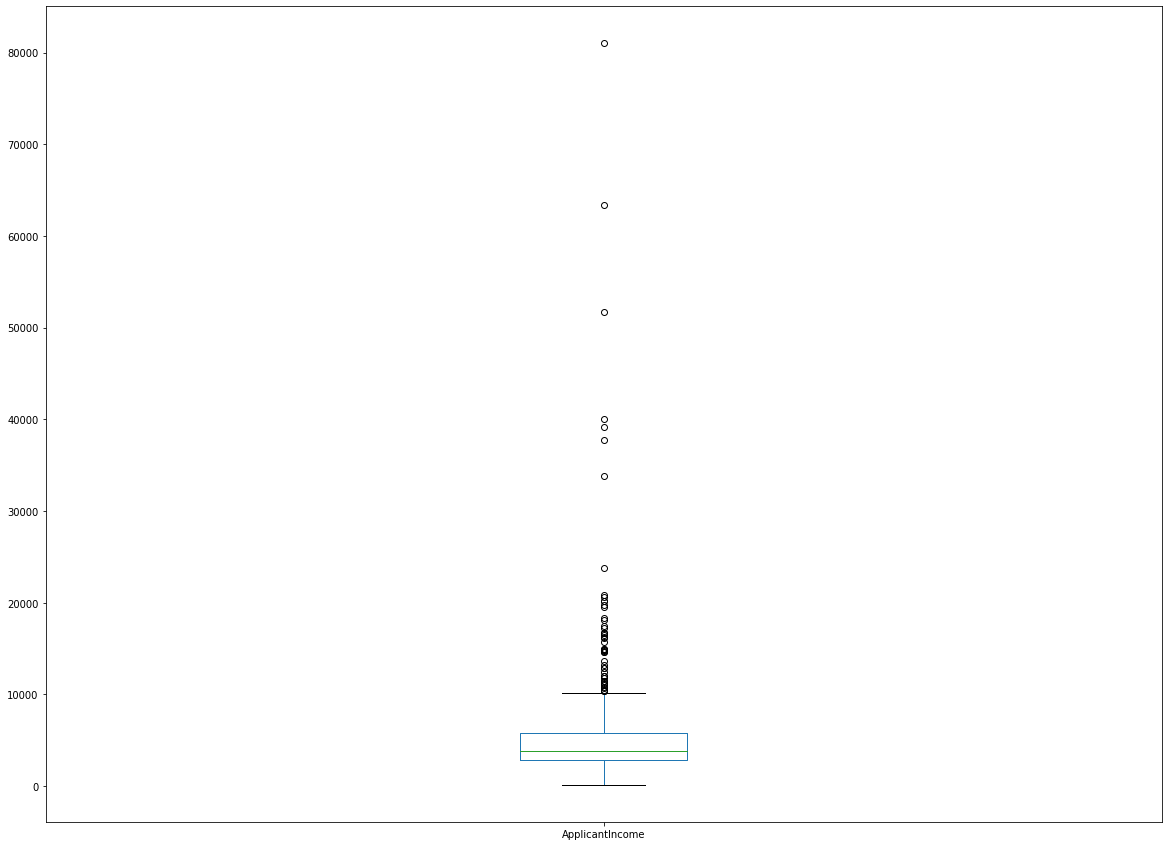

In [28]:
for i in cont_cols:
    plt.figure(figsize = (20, 15))
    df[i].plot.box()

In [29]:
df[cont_cols].skew()

CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.402112
ApplicantIncome      6.539513
dtype: float64

In [30]:
df_new = df

In [31]:
from sklearn.preprocessing import power_transform        #removing skewness
df_new[cont_cols] = power_transform(df[cont_cols], method='yeo-johnson')        #using yeo-johnson method due to presence of negative skewness
df_new = pd.DataFrame(df_new, columns = df.columns)

In [32]:
df_new[cont_cols].skew()

CoapplicantIncome   -0.145646
LoanAmount           0.024376
Loan_Amount_Term     0.392571
ApplicantIncome     -0.092946
dtype: float64

In [34]:
cate_cols.remove('Credit_History')
cate_cols.remove('Loan_Status')

In [35]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in cate_cols:
    df_new[col] = label_encoder.fit_transform(df_new[col])

In [36]:
df_new.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int64
dtype: object

In [37]:
df_new['Loan_ID'] = df_new['Loan_ID'].apply(lambda x: x[2:])
df_new['Loan_ID'] = df_new['Loan_ID'].astype(float)
df_new['Loan_ID']

0      1002.0
1      1003.0
2      1005.0
3      1006.0
4      1008.0
        ...  
609    2978.0
610    2979.0
611    2983.0
612    2984.0
613    2990.0
Name: Loan_ID, Length: 614, dtype: float64

In [38]:
df_new.dtypes

Loan_ID              float64
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int64
dtype: object

In [39]:
x = df_new.drop('Loan_Status', axis = 1)
y = df_new['Loan_Status']

# Best Random State

In [50]:
maxAccu = 0
maxRS = 0

for i in range (1, 500):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train, y_train)
    pred = LR.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print ('Max Accuracy obtained is', maxAccu, 'on Random State', maxRS)

Max Accuracy obtained is 0.8810810810810811 on Random State 389


# Creating Train Test Split

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 389)

In [63]:
LR = LogisticRegression()
nb = GaussianNB()
DTC = DecisionTreeClassifier()
rf = RandomForestClassifier()
models = [LR, nb, DTC, rf]
for i in models:
    print (i)
    i.fit(x_train, y_train)
    pred = i.predict(x_test)
    print (accuracy_score(y_test, pred))
    print (confusion_matrix(y_test, pred))
    print (classification_report(y_test, pred))


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
0.8810810810810811
[[ 28  21]
 [  1 135]]
              precision    recall  f1-score   support

           0       0.97      0.57      0.72        49
           1       0.87      0.99      0.92       136

    accuracy                           0.88       185
   macro avg       0.92      0.78      0.82       185
weighted avg       0.89      0.88      0.87       185

GaussianNB(priors=None, var_smoothing=1e-09)
0.8810810810810811
[[ 28  21]
 [  1 135]]
              precision    recall  f1-score   support

           0       0.97      0.57      0.72        49
           1       0.87      0.99      0.92       136

    accuracy                           0.88       185


In [64]:
for i in models:
    cvs = cross_val_score(i, x, y, cv = 5)
    print ('Cross Validation Score for ',i, ' model is :', cvs.mean())
    print (' ')

Cross Validation Score for  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)  model is : 0.8029188324670132
 
Cross Validation Score for  GaussianNB(priors=None, var_smoothing=1e-09)  model is : 0.8029588164734107
 
Cross Validation Score for  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')  model is : 0.7019192323070771
 
Cross Validation Sc

The difference between accuracy and cross val score is least in Random Forest Model, hence we will use it.

# Hypertuning

In [65]:
from sklearn.model_selection import GridSearchCV

In [66]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [67]:
rfc = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 3)
rfc.fit(x_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [68]:
rfc.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 200}

In [69]:
rfc1=RandomForestClassifier(random_state=389, max_features='auto', n_estimators= 200, max_depth=4, criterion='gini')
rfc1.fit(x_train, y_train)
predrfc1 = rfc1.predict(x_test)
print (accuracy_score(y_test, predrfc1))
print (confusion_matrix(y_test, predrfc1))
print (classification_report(y_test, predrfc1))

0.8756756756756757
[[ 27  22]
 [  1 135]]
              precision    recall  f1-score   support

           0       0.96      0.55      0.70        49
           1       0.86      0.99      0.92       136

    accuracy                           0.88       185
   macro avg       0.91      0.77      0.81       185
weighted avg       0.89      0.88      0.86       185



In [70]:
cvs = cross_val_score(rfc1, x, y, cv = 5)
print ('Cross Validation Score for ',rfc1, ' model is :', cvs.mean())

Cross Validation Score for  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=389,
                       verbose=0, warm_start=False)  model is : 0.8094762095161936


After hypertuning with GridSearchCV our model accuracy increased from 84 to 88 and cross val score also increased from 78 to 81.

In [71]:
import pickle

filename = 'LoanStatusRfc.pkl'
pickle.dump(rfc1, open(filename, 'wb'))

# Conclusion

In [72]:
loaded_model = pickle.load(open('LoanStatusRfc.pkl', 'rb'))
result = loaded_model.score(x_test, y_test)
print (result)

0.8756756756756757


In [73]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:], predrfc1[:]], index = ['Predicted', 'Original'])

In [74]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,175,176,177,178,179,180,181,182,183,184
Predicted,1,1,1,1,0,1,1,1,1,1,...,0,1,1,1,1,1,0,1,1,1
Original,1,1,1,1,0,1,1,1,1,1,...,0,1,1,1,1,1,0,1,1,1
